In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# import simulated data
data_simulated = pd.read_csv('./ECG_data/SimulatedECG.txt', sep=" ", header=1)
data_simulated.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

In [4]:
# import measured data
data_measured = pd.read_csv('./ECG_data/MeasuredECG.txt', sep=" ", header=1)
data_measured.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

<IPython.core.display.Javascript object>


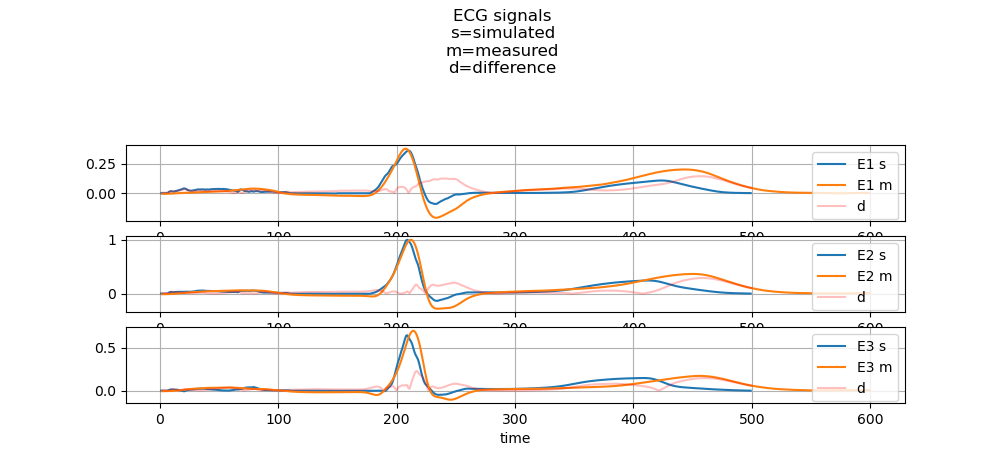

In [70]:
%matplotlib notebook
#fig = plt.figure(figsize=(8.5, 10.5))
fig = plt.figure()
fig.suptitle('ECG signals\ns=simulated\nm=measured\nd=difference')

header = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']
#l = len(header)
l = 4
for i in range(l):
    if header[i] == 'time': continue

    fig.add_subplot(l, 1, i + 1)
    plt.plot(data_simulated['time'], data_simulated[header[i]], label=header[i] + ' s')
    plt.plot(data_measured['time'], data_measured[header[i]], label=header[i] + ' m')
    plt.plot(data_measured['time'], abs(data_simulated[header[i]] - data_measured[header[i]]), c='r', alpha=.25, label='d')
    plt.grid()
    plt.legend(loc='upper right')

plt.xlabel('time')
plt.show()

# secondly as Andreas intended

With $n$ dimensions. We want to find a function $f$ to fit the series depending on a vector $\vec{p}$. We choose $f(y_i,\dot{y}_i;\vec{p})=p_0\cdot y+p_1 \cdot \dot{y} + p_2 \cdot y^2 + p_3 \cdot y \cdot \dot{y} + p_4 \cdot \dot{y}^2$ where the dataset $\{y, \dot{y}\}$ is the one we want $f$ to be fitted to.

$$
\frac{1}{n} \sum_i^n(f(y_i,\dot{y}_i;\vec{p})-z_i)^2 = Min.
$$

Which is equivalent to:

$$
\frac{\partial}{\partial p_k}\sum_i^n(f(y_i,\dot{y}_i;\vec{p})-z_i)^2=\sum_i^n(f(y_i,\dot{y}_i;\vec{p})-z_i)\frac{\partial}{\partial p_k}f(y_i,\dot{y}_i;\vec{p})=0
$$

Which yields a system of equations. Written in $A\cdot p=b$:

$$
\begin{pmatrix}
\sum_i^n y_i^2 & \sum_i^n y_i \dot{y}_i & \sum_i^n y_i^3 & \sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i \dot{y}_i^2 \\
\sum_i^n y_i \dot{y}_i & \sum_i^n \dot{y}_i^2 & \sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i \dot{y}_i^2 & \sum_i^n \dot{y}_i^3 \\
\sum_i^n y_i^3 & \sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i^4 & \sum_i^n y_i^3 \dot{y}_i & \sum_i^n y_i^2 \dot{y}_i^2 \\
\sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i \dot{y}_i^2 & \sum_i^n y_i^3 \dot{y}_i & \sum_i^n y_i^2 \dot{y}_i^2 & \sum_i^n y_i \dot{y}_i^3 \\
\sum_i^n y_i \dot{y}_i^2 & \sum_i^n \dot{y}_i^3 & \sum_i^n y_i^2 \dot{y}_i^2 & \sum_i^n y_i \dot{y}_i^3 & \sum_i^n y_i \dot{y}_i^4 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
p_0 \\
p_1 \\
p_2 \\
p_3 \\
p_4 \\
\end{pmatrix}
=
\begin{pmatrix}
\sum_i^n z_i y_i \\
\sum_i^n z_i \dot{y}_i \\
\sum_i^n z_i y_i^2 \\
\sum_i^n z_i y_i \dot{y}_i \\
\sum_i^n z_i \dot{y_i}^2 \\
\end{pmatrix}
$$

Solvibng for $\vec{p}$ yields:

$$
\vec{p} = A^{-1} \cdot b
$$

where $A^{-1}_{ij} = \frac{\alpha_{ij}}{|A|}$ and $\alpha_{ij}$ are the elements of the adjoint matrix $A_{ad}$.

Applying to ECG series using this snippet:

In [44]:
def solve_eqs_for_p(y, ydot, z):
    a = [[np.sum(y ** 2), np.sum(y * ydot), np.sum(y ** 3), np.sum(y ** 2 * ydot), np.sum(y * ydot ** 2)],
         [np.sum(y * ydot), np.sum(ydot ** 2), np.sum(y ** 2 * ydot), np.sum(y * ydot ** 2), np.sum(ydot ** 3)],
         [np.sum(y ** 3), np.sum(y ** 2 * ydot), np.sum(y ** 4), np.sum(y ** 3 * ydot), np.sum(y ** 2 * ydot ** 2)],
         [np.sum(y ** 2 * ydot), np.sum(y * ydot ** 2), np.sum(y ** 3 * ydot), np.sum(y ** 2 * ydot ** 2), np.sum(y * ydot ** 3)],
         [np.sum(y * ydot ** 2), np.sum(ydot ** 3), np.sum(y ** 2 * ydot ** 2), np.sum(y * ydot ** 3), np.sum(y * ydot ** 4)]
        ]
    b = [[np.sum(z * y)],
         [np.sum(z * ydot)],
         [np.sum(z * y ** 2)],
         [np.sum(z * y * ydot)],
         [np.sum(z * ydot ** 2)]
        ]
    
    #print(np.array(a))
    #print(np.array(b))
    
    return np.linalg.solve(a, b)

For the purpose of better derivation, we use a high order upwind scheme, achieved by this snippet:

In [ ]:
def fifth_order_upwind_scheme(series):
    pass

## Example for channel E1

In [45]:
# for z_1 = y_dot
#                     v-- y                      v-- y_dot                      v-- y_dot
o_1 = solve_eqs_for_p(data_simulated['E1'][:-1], np.diff(data_simulated['E1']), np.diff(data_simulated['E1']))
# for z_2 = y_dot_dot
#                     v-- y                      v-- y_dot                           v-- y_dot_dot
o_2 = solve_eqs_for_p(data_simulated['E1'][:-2], np.diff(data_simulated['E1'])[:-1], np.diff(np.diff(data_simulated['E1'])))

The resulting fit-functions looks the following:

In [61]:
print_function = lambda p: print('%f * y + %f * ydot + %f * y ** 2 + %f * y * ydot + %f * ydot ** 2' % \
                                 (p[0], p[1], p[2], p[3], p[4]))

print_function(o_1)
print_function(o_2)

0.000000 * y + 1.000000 * ydot + 0.000000 * y ** 2 + 0.000000 * y * ydot + -0.000000 * ydot ** 2
0.002485 * y + -0.190035 * ydot + -0.029187 * y ** 2 + 0.705349 * y * ydot + -1.742244 * ydot ** 2


<IPython.core.display.Javascript object>


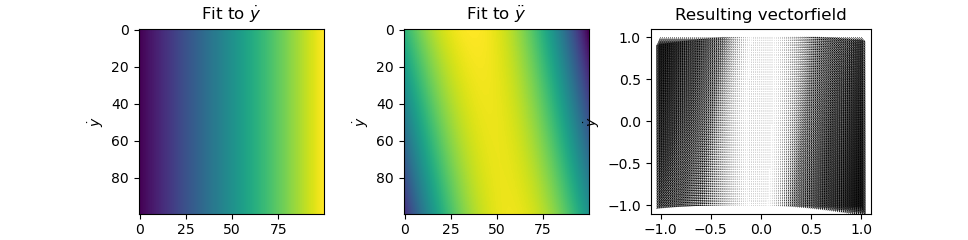

In [105]:
%matplotlib notebook
f = lambda y, ydot, p: p[0] * y + p[1] * ydot + p[2] * y ** 2 + p[3] * y * ydot + p[4] * ydot ** 2

y = np.linspace(-1, 1, 100)
ydot = y

fig = plt.figure()

ax_1 = fig.add_subplot(1, 3, 1)
r_1 = [[np.sum(f(el, sel, o_1)) for sel in ydot] for el in y]
ax_1.imshow(r_1)
ax_1.set_xlabel('$y$')
ax_1.set_ylabel('$\dot{y}$')
ax_1.set_title('Fit to $\dot{y}$')

ax_2 = fig.add_subplot(1, 3, 2)
r_2 = [[np.sum(f(el, sel, o_2)) for sel in ydot] for el in y]
ax_2.imshow(r_2)
ax_2.set_xlabel('$y$')
ax_2.set_ylabel('$\dot{y}$')
ax_2.set_title('Fit to $\ddot{y}$')

ax_3 = fig.add_subplot(1, 3, 3)
ax_3.quiver(y, ydot, r_1, r_2, scale=50)
ax_3.set_xlabel('$y$')
ax_3.set_ylabel('$\dot{y}$')
ax_3.set_title('Resulting vectorfield')

plt.show()

## Doing this for all channels
The following plot shows the Fit to $\ddot{y}$ for all channels, simulated and measured.

In [109]:
header = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

r = []
for el in header:
    if el == 'time': continue
    o = solve_eqs_for_p(data_simulated[el][:-2], np.diff(data_simulated[el])[:-1], \
                        np.diff(np.diff(data_simulated[el])))
    r.append(o)

<IPython.core.display.Javascript object>


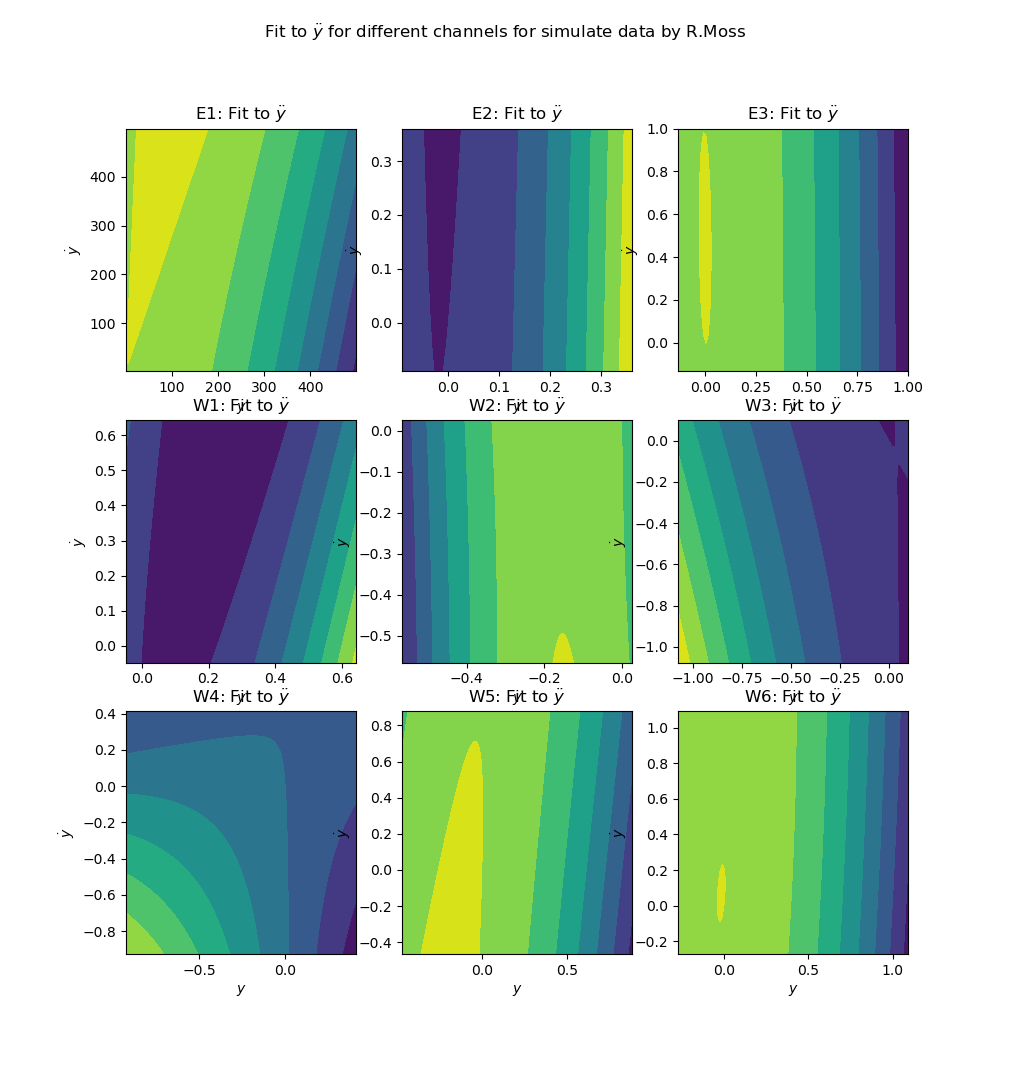

In [119]:
%matplotlib notebook
fig = plt.figure()

fig.suptitle('Fit to $\ddot{y}$ for different channels for simulated data by R.Moss')

for i in range(len(r)):   
    
    y = np.linspace(min(data_simulated[header[i]]), max(data_simulated[header[i]]), 100)
    ydot = y
    
    r_ = [[np.sum(f(el, sel, r[i])) for sel in ydot] for el in y]
    
    ax = fig.add_subplot(3, 3, i + 1)
    ax.contourf(y, ydot, r_)
    
    ax.set_xlabel('$y$')
    ax.set_ylabel('$\dot{y}$')
    ax.set_title('%s: Fit to $\ddot{y}$' % (header[i + 1]))

In [120]:
header = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

r = []
for el in header:
    if el == 'time': continue
    o = solve_eqs_for_p(data_measured[el][:-2], np.diff(data_measured[el])[:-1], \
                        np.diff(np.diff(data_measured[el])))
    r.append(o)

<IPython.core.display.Javascript object>


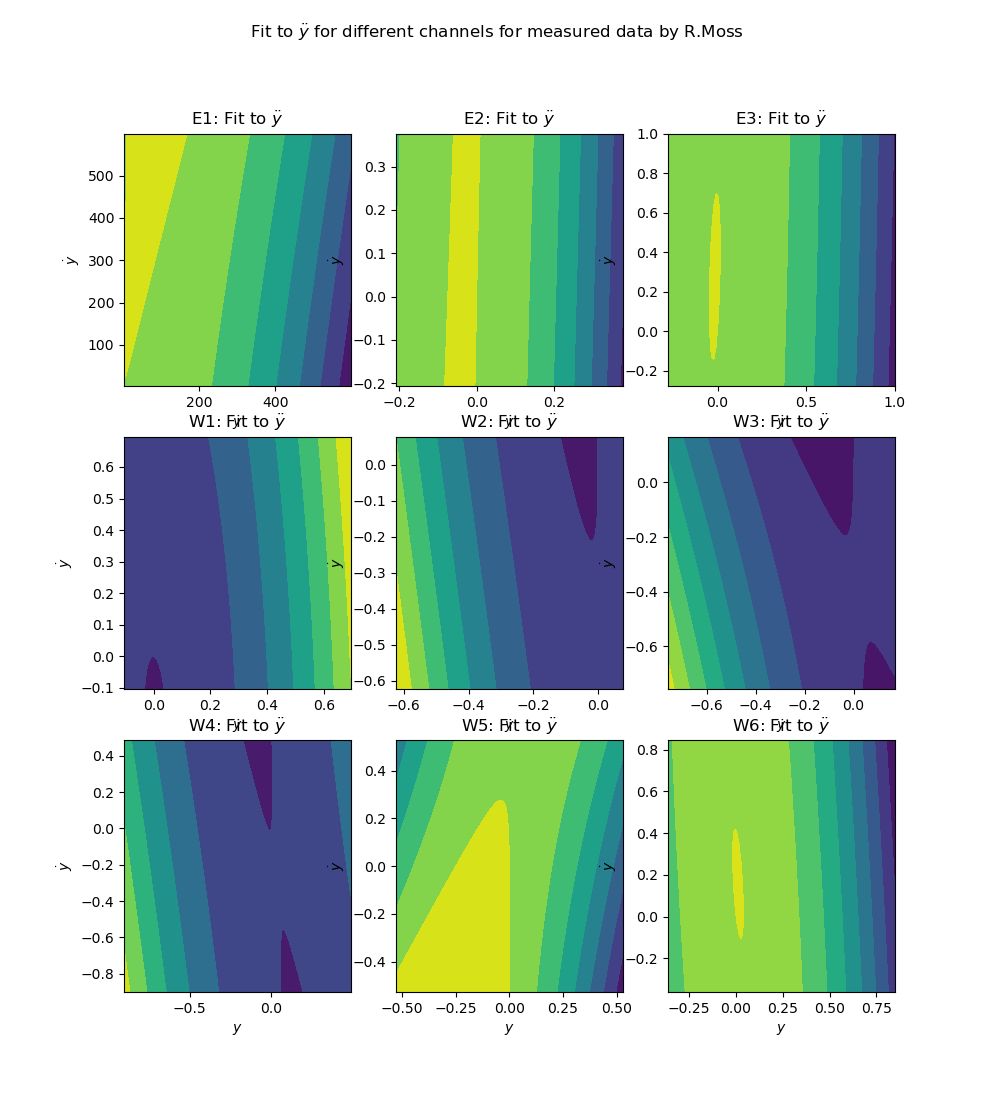

In [121]:
%matplotlib notebook
fig = plt.figure()

fig.suptitle('Fit to $\ddot{y}$ for different channels for measured data by R.Moss')

for i in range(len(r)):   
    
    y = np.linspace(min(data_measured[header[i]]), max(data_measured[header[i]]), 100)
    ydot = y
    
    r_ = [[np.sum(f(el, sel, r[i])) for sel in ydot] for el in y]
    
    ax = fig.add_subplot(3, 3, i + 1)
    ax.contourf(y, ydot, r_)
    
    ax.set_xlabel('$y$')
    ax.set_ylabel('$\dot{y}$')
    ax.set_title('%s: Fit to $\ddot{y}$' % (header[i + 1]))

# ToDo
- [ ] Mehrpunktableitung periodisch